# Lecture 07 - Ensemble Models

## Import Libraries

In [2]:
!pip install xgboost

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pandas import ExcelWriter
import plotly.express as px

## Load the Data

In [5]:
my_drive_path = "/content/drive/MyDrive/SUNY/Class Material/2024 Fall/MSA550A/Python Class Work/msa550-code-files/data/"

In [7]:
# Load and prepare the data
bank_df = pd.read_csv(my_drive_path + 'UniversalBank.csv')
bank_df = bank_df.drop(columns=['ID', 'ZIP Code'])

# Drop any rows with missing values
bank_df = bank_df.dropna()


X = bank_df.drop(columns=['Personal Loan'])
y = bank_df['Personal Loan']

In [10]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## Random Forest Model

### Creating and Tuning the Model

In [25]:
# Updated list of hyperparameters for tuning
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 30],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 4],
    'max_features': ['sqrt', 'log2']
}

In [26]:
rf_model = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 30],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 4],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100]},
             scoring='accuracy', verbose=2)

### Fitting the Best RF Model

In [27]:
# Best parameters and accuracy from grid search
best_rf_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)
print("Best Training Accuracy:", grid_search.best_score_)

Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Training Accuracy: 0.984


In [28]:
# Fit the model with the best parameters on the training data
best_rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

### Predicting with the Best RF Model

In [29]:
# Predict on test data
y_pred = best_rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.988


### Overfitting Plot

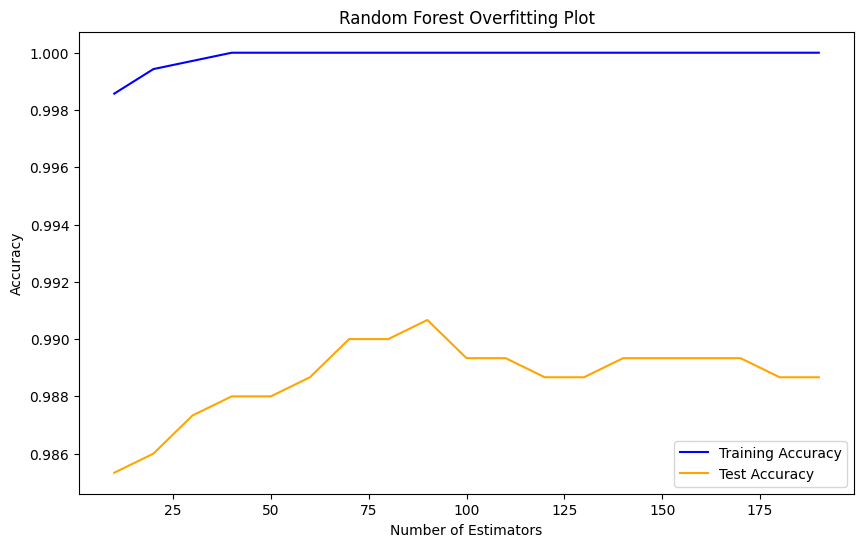

In [30]:
# Overfitting plot: Training vs. Test Score
train_scores = []
test_scores = []

# Extract the best parameters from grid_search, excluding 'n_estimators'
best_params = {k: v for k, v in grid_search.best_params_.items() if k != 'n_estimators'}

# Varying number of estimators to observe overfitting behavior
for n in range(10, 200, 10):
    temp_rf = RandomForestClassifier(n_estimators=n, random_state=42, **best_params)
    temp_rf.fit(X_train, y_train)
    train_scores.append(temp_rf.score(X_train, y_train))
    test_scores.append(temp_rf.score(X_test, y_test))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(range(10, 200, 10), train_scores, label="Training Accuracy", color="blue")
plt.plot(range(10, 200, 10), test_scores, label="Test Accuracy", color="orange")
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")
plt.title("Random Forest Overfitting Plot")
plt.legend()
plt.show()

### Feature Importance

[0.03823272 0.04423871 0.3523541  0.11185329 0.16280577 0.17969226
 0.03938518 0.00421128 0.04987984 0.00834797 0.00899888]


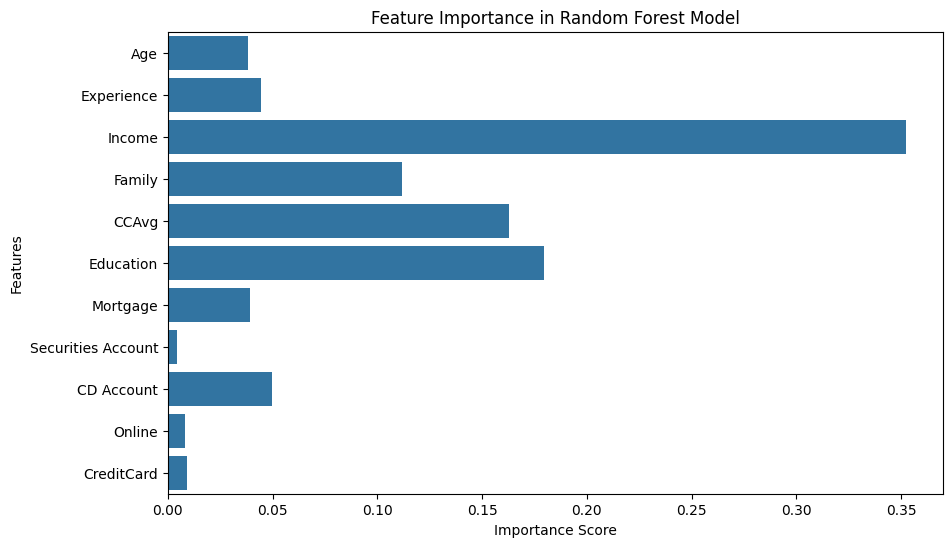

In [31]:
# Investigating Feature Importance
feature_importances = best_rf_model.feature_importances_
features = X.columns

print(feature_importances)


# Plotting Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features)
plt.title("Feature Importance in Random Forest Model")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

## Extra Trees Model

In [18]:
# List of hyperparameters for tuning
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [20, 30],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 4],
    'max_features': ['sqrt', 'log2']
}

In [19]:
# GridSearch for the best parameters
et_model = ExtraTreesClassifier(random_state=42)
grid_search = GridSearchCV(estimator=et_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=ExtraTreesClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [20, 30],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 4],
                         'min_samples_split': [2, 10],
                         'n_estimators': [50, 100]},
             scoring='accuracy', verbose=2)

In [20]:
# Best parameters and accuracy from grid search
best_et_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)
print("Best Training Accuracy:", grid_search.best_score_)

Best Parameters: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Training Accuracy: 0.9805714285714286


In [21]:
# Fit the model with the best parameters on the training data
best_et_model.fit(X_train, y_train)

ExtraTreesClassifier(max_depth=30, random_state=42)

In [22]:
# Predict on test data
y_pred = best_et_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.9846666666666667


### Overfitting Plot

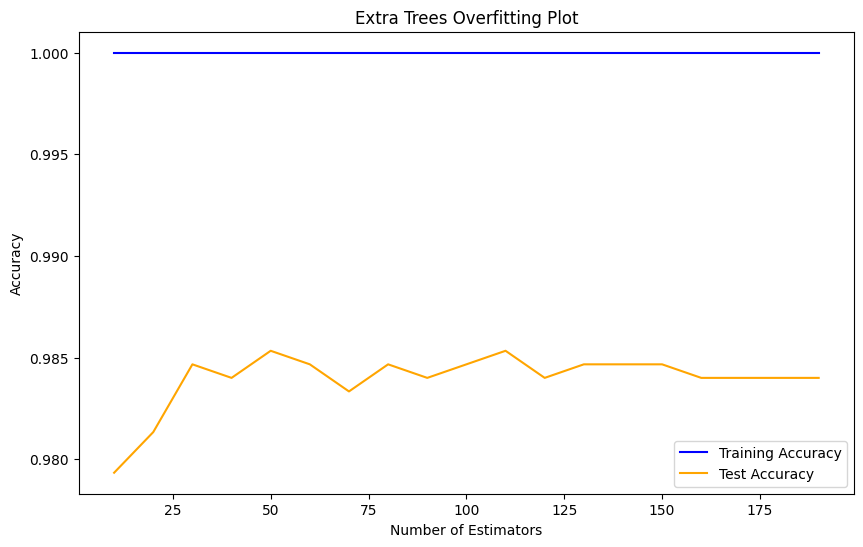

In [23]:
# Overfitting plot: Training vs. Test Score
train_scores = []
test_scores = []

# Extract the best parameters from grid_search, excluding 'n_estimators'
best_params = {k: v for k, v in grid_search.best_params_.items() if k != 'n_estimators'}

# Varying number of estimators to observe overfitting behavior
for n in range(10, 200, 10):
    temp_et = ExtraTreesClassifier(n_estimators=n, random_state=42, **best_params)
    temp_et.fit(X_train, y_train)
    train_scores.append(temp_et.score(X_train, y_train))
    test_scores.append(temp_et.score(X_test, y_test))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(range(10, 200, 10), train_scores, label="Training Accuracy", color="blue")
plt.plot(range(10, 200, 10), test_scores, label="Test Accuracy", color="orange")
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")
plt.title("Extra Trees Overfitting Plot")
plt.legend()
plt.show()




### Feature Importance

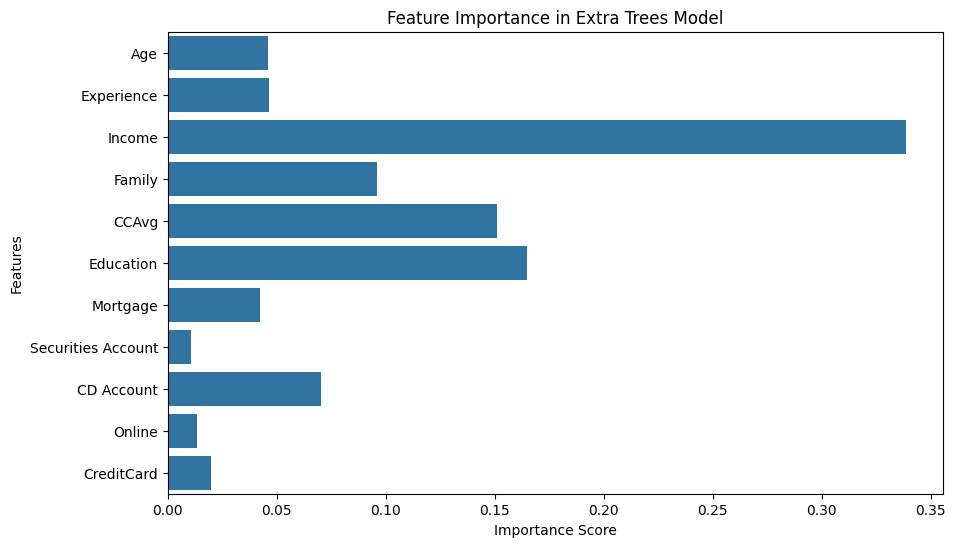

In [24]:
# Investigating Feature Importance
feature_importances = best_et_model.feature_importances_
features = X.columns

# Plotting Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features)
plt.title("Feature Importance in Extra Trees Model")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

## AdaBoost Model

In [32]:
# List of hyperparameters for tuning
param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.1, 0.5],
    'estimator__max_depth': [1, 3]
}

In [33]:
# Using Decision Tree as base estimator for AdaBoost
base_estimator = DecisionTreeClassifier(random_state=42)

# GridSearch for the best parameters
ada_model = AdaBoostClassifier(estimator=base_estimator, algorithm='SAMME', random_state=42)
grid_search = GridSearchCV(estimator=ada_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(algorithm='SAMME',
                                          estimator=DecisionTreeClassifier(random_state=42),
                                          random_state=42),
             n_jobs=-1,
             param_grid={'estimator__max_depth': [1, 3],
                         'learning_rate': [0.1, 0.5],
                         'n_estimators': [50, 100]},
             scoring='accuracy', verbose=2)

In [34]:
# Best parameters and accuracy from grid search
best_ada_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)
print("Best Training Accuracy:", grid_search.best_score_)

# Fit the model with the best parameters on the training data
best_ada_model.fit(X_train, y_train)

Best Parameters: {'estimator__max_depth': 3, 'learning_rate': 0.5, 'n_estimators': 100}
Best Training Accuracy: 0.984


AdaBoostClassifier(algorithm='SAMME',
                   estimator=DecisionTreeClassifier(max_depth=3,
                                                    random_state=42),
                   learning_rate=0.5, n_estimators=100, random_state=42)

In [35]:
# Predict on test data
y_pred = best_ada_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.988


### Overfitting Plot

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

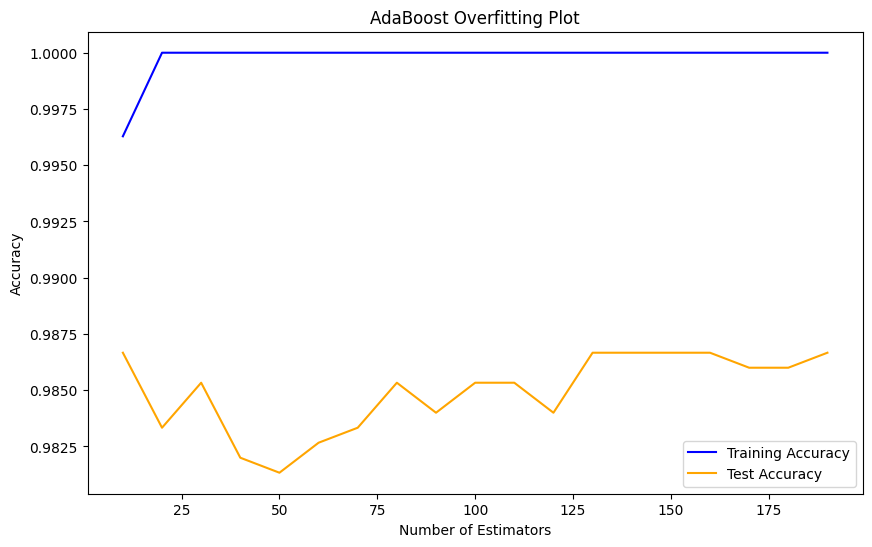

In [36]:
# Overfitting plot: Training vs. Test Score
train_scores = []
test_scores = []

# Varying number of estimators to observe overfitting behavior
for n in range(10, 200, 10):
    temp_ada = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=grid_search.best_params_['estimator__max_depth']),
                                  n_estimators=n,
                                  learning_rate=grid_search.best_params_['learning_rate'],
                                  random_state=42)
    temp_ada.fit(X_train, y_train)
    train_scores.append(temp_ada.score(X_train, y_train))
    test_scores.append(temp_ada.score(X_test, y_test))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(range(10, 200, 10), train_scores, label="Training Accuracy", color="blue")
plt.plot(range(10, 200, 10), test_scores, label="Test Accuracy", color="orange")
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")
plt.title("AdaBoost Overfitting Plot")
plt.legend()
plt.show()


### Feature Importance

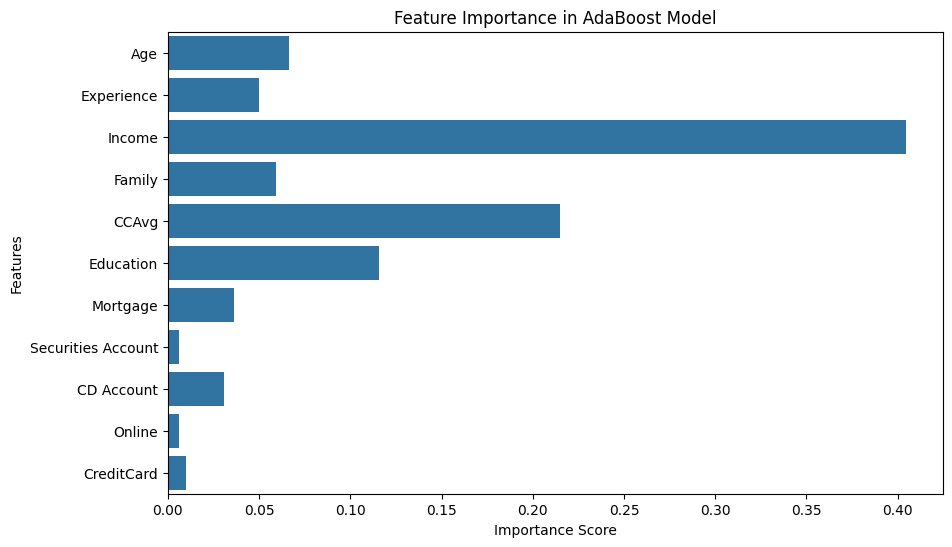

In [37]:
# Investigating Feature Importance
feature_importances = best_ada_model.feature_importances_
features = X.columns

# Plotting Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features)
plt.title("Feature Importance in AdaBoost Model")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


## Gradient Boosting

In [38]:
# List of hyperparameters for tuning
param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.1, 0.5],
    'max_depth': [3, 7],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 4]
}

In [39]:
# GridSearch for the best parameters
gb_model = GradientBoostingClassifier(random_state=42)
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.5], 'max_depth': [3, 7],
                         'min_samples_leaf': [1, 4],
                         'min_samples_split': [2, 10],
                         'n_estimators': [50, 100]},
             scoring='accuracy', verbose=2)

In [40]:
# Best parameters and accuracy from grid search
best_gb_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)
print("Best Training Accuracy:", grid_search.best_score_)

# Fit the model with the best parameters on the training data
best_gb_model.fit(X_train, y_train)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Training Accuracy: 0.9857142857142858


GradientBoostingClassifier(random_state=42)

In [41]:
# Predict on test data
y_pred = best_gb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.99


### Overfitting Plot

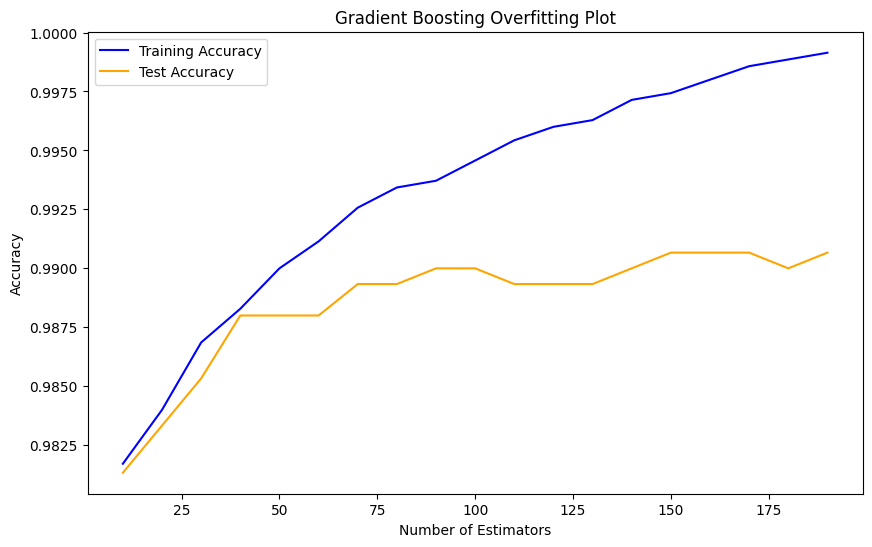

In [42]:
# Overfitting plot: Training vs. Test Score
train_scores = []
test_scores = []

# Varying number of estimators to observe overfitting behavior
for n in range(10, 200, 10):
    temp_gb = GradientBoostingClassifier(n_estimators=n,
                                         learning_rate=grid_search.best_params_['learning_rate'],
                                         max_depth=grid_search.best_params_['max_depth'],
                                         min_samples_split=grid_search.best_params_['min_samples_split'],
                                         min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
                                         random_state=42)
    temp_gb.fit(X_train, y_train)
    train_scores.append(temp_gb.score(X_train, y_train))
    test_scores.append(temp_gb.score(X_test, y_test))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(range(10, 200, 10), train_scores, label="Training Accuracy", color="blue")
plt.plot(range(10, 200, 10), test_scores, label="Test Accuracy", color="orange")
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")
plt.title("Gradient Boosting Overfitting Plot")
plt.legend()
plt.show()

### Feature Importance

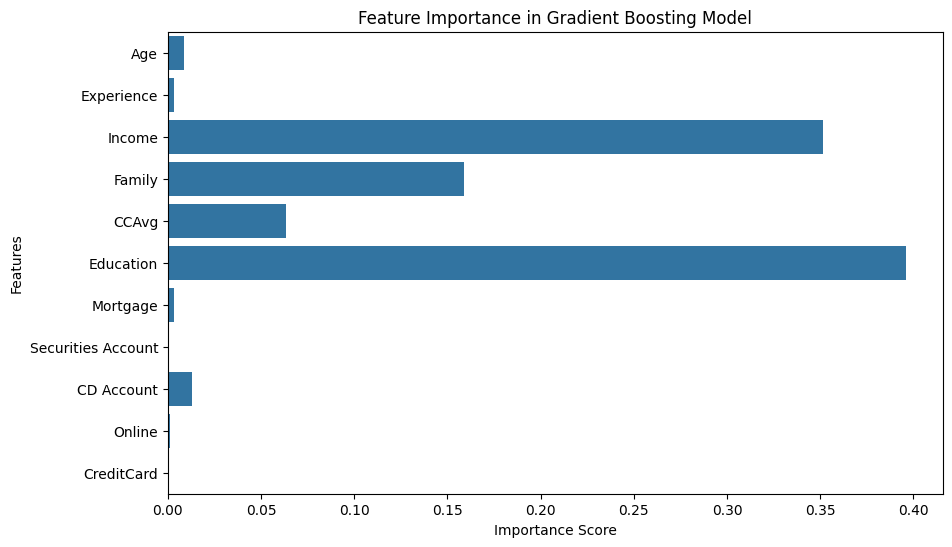

In [43]:
# Investigating Feature Importance
feature_importances = best_gb_model.feature_importances_
features = X.columns

# Plotting Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features)
plt.title("Feature Importance in Gradient Boosting Model")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

### Using Functions
**We could always use function for repeating codes**


In [45]:
def getFe(model):
  # Investigating Feature Importance
  feature_importances = model.feature_importances_
  features = X.columns

  # Plotting Feature Importance
  plt.figure(figsize=(10, 6))
  sns.barplot(x=feature_importances, y=features)
  plt.title("Feature Importance in Gradient Boosting Model")
  plt.xlabel("Importance Score")
  plt.ylabel("Features")
  plt.show()

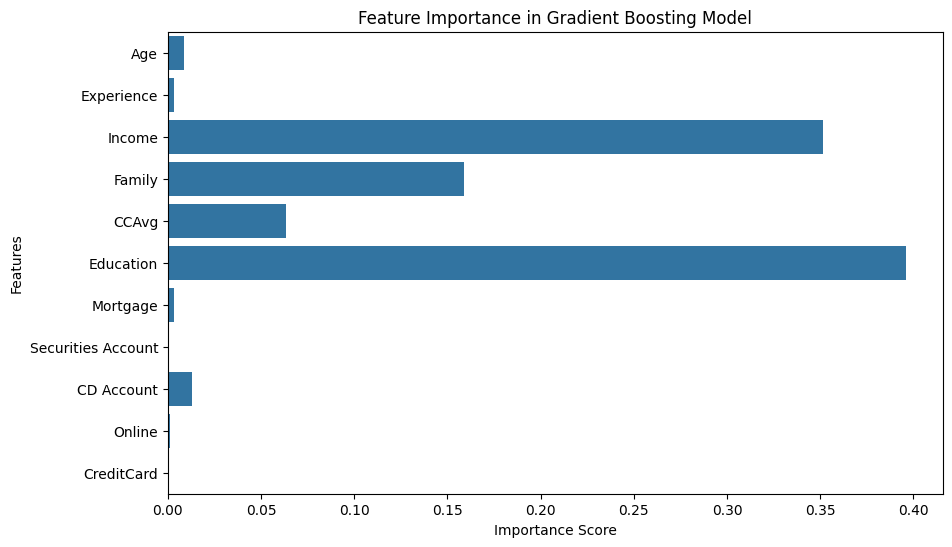

In [46]:
getFe(best_gb_model)

## XGBoost Model

In [47]:
# List of hyperparameters for tuning
param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.1, 0.5],
    'max_depth': [3, 7],
    'subsample': [0.6, 0.8],
    'colsample_bytree': [0.6, 0.8,],
    'gamma': [0, 0.1, 0.5]
}


In [48]:
# GridSearch for the best parameters
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:35:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.8], 'gamma': [0, 0.1, 0.5],
                         'learning_rate': [0.1, 0.5], 'max_depth': [3, 7],
                         'n_estimators': [50, 100], 'subsample': [0.6, 0.8]},
             scoring='accuracy', verbose=2)

In [49]:
# Best parameters and accuracy from grid search
best_xgb_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)
print("Best Training Accuracy:", grid_search.best_score_)

# Fit the model with the best parameters on the training data
best_xgb_model.fit(X_train, y_train)

Best Parameters: {'colsample_bytree': 0.6, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100, 'subsample': 0.8}
Best Training Accuracy: 0.9865714285714287


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:35:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0.1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [50]:
# Predict on test data
y_pred = best_xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.992


### Overfitting Plot

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:35:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:35:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:35:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:35:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:35:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

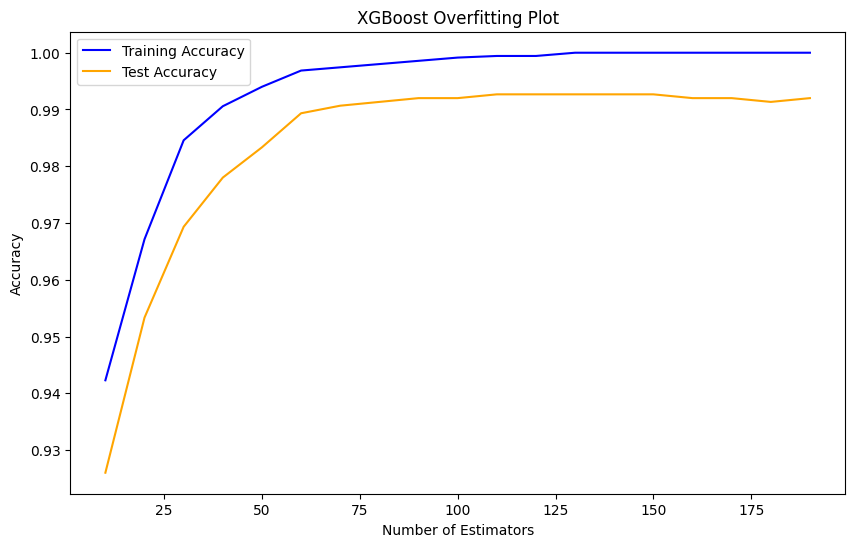

In [51]:
# Overfitting plot: Training vs. Test Score
train_scores = []
test_scores = []

# Varying number of estimators to observe overfitting behavior
for n in range(10, 200, 10):
    temp_xgb = XGBClassifier(n_estimators=n,
                             learning_rate=grid_search.best_params_['learning_rate'],
                             max_depth=grid_search.best_params_['max_depth'],
                             subsample=grid_search.best_params_['subsample'],
                             colsample_bytree=grid_search.best_params_['colsample_bytree'],
                             gamma=grid_search.best_params_['gamma'],
                             use_label_encoder=False,
                             eval_metric='logloss',
                             random_state=42)
    temp_xgb.fit(X_train, y_train)
    train_scores.append(temp_xgb.score(X_train, y_train))
    test_scores.append(temp_xgb.score(X_test, y_test))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(range(10, 200, 10), train_scores, label="Training Accuracy", color="blue")
plt.plot(range(10, 200, 10), test_scores, label="Test Accuracy", color="orange")
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")
plt.title("XGBoost Overfitting Plot")
plt.legend()
plt.show()

### Feature Importance

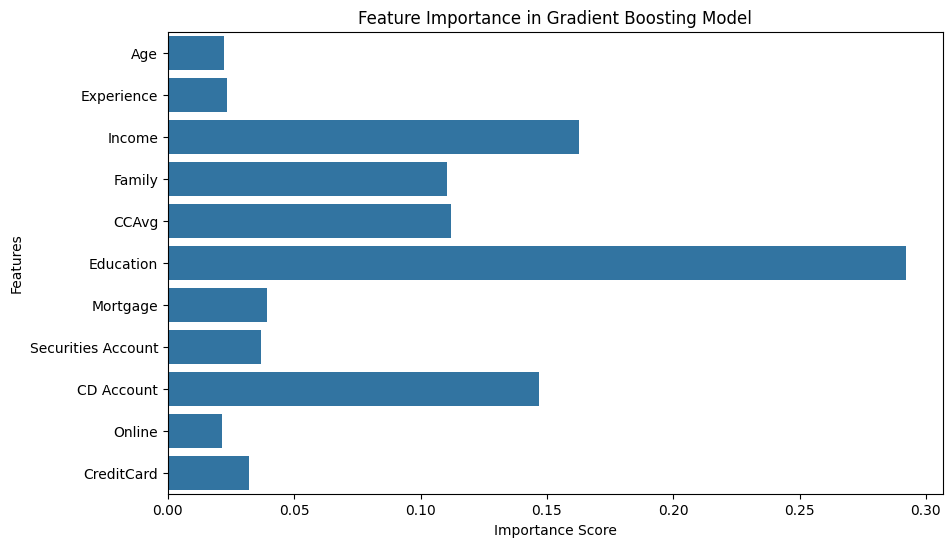

In [52]:
#using the function declared above!!!
getFe(best_xgb_model)

## Stacking Model Example

In [53]:
# Define base models for stacking
base_models = [
    ('lr', LogisticRegression(max_iter=500, random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42))
]

In [54]:
# Define meta-model
meta_model = LogisticRegression(max_iter=2000, random_state=42)

In [55]:
# Define Stacking Classifier
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

# Fit the stacking model
stacking_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

StackingClassifier(cv=5,
                   estimators=[('lr',
                                LogisticRegression(max_iter=500,
                                                   random_state=42)),
                               ('rf',
                                RandomForestClassifier(max_depth=5,
                                                       random_state=42)),
                               ('gb',
                                GradientBoostingClassifier(random_state=42))],
                   final_estimator=LogisticRegression(max_iter=2000,
                                                      random_state=42))

In [56]:
# Predict on test data
y_pred = stacking_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy of Stacking Model:", accuracy)

Test Accuracy of Stacking Model: 0.9893333333333333


### Overfitting Plot

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

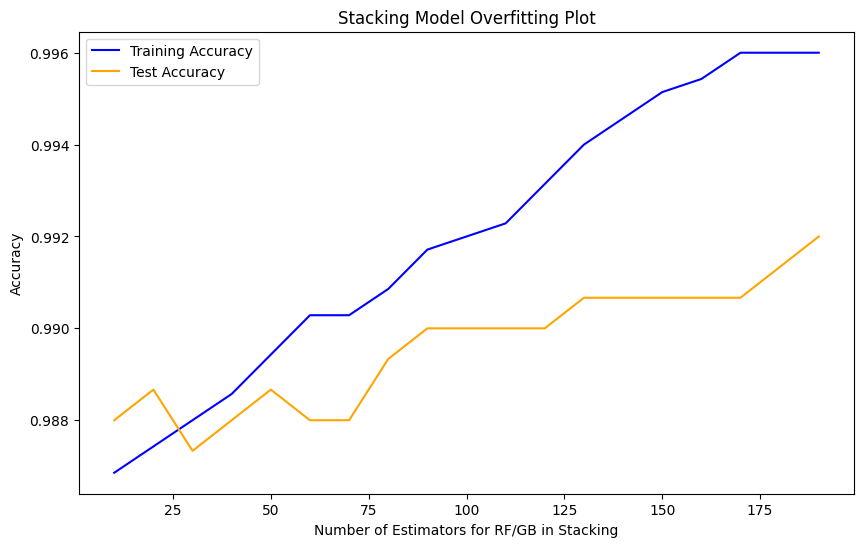

In [57]:
# Overfitting plot: Training vs. Test Score
train_scores = []
test_scores = []

# Varying the number of estimators for the Random Forest and Gradient Boosting components to observe overfitting behavior
for n in range(10, 200, 10):
    temp_rf = RandomForestClassifier(n_estimators=n, max_depth=5, random_state=42)
    temp_gb = GradientBoostingClassifier(n_estimators=n, learning_rate=0.1, max_depth=3, random_state=42)

    # Temporarily redefine stacking model with adjusted base models
    temp_stacking_model = StackingClassifier(
        estimators=[('lr', LogisticRegression(max_iter=1000, random_state=42)), ('rf', temp_rf), ('gb', temp_gb)],
        final_estimator=meta_model,
        cv=5
    )
    temp_stacking_model.fit(X_train, y_train)
    train_scores.append(temp_stacking_model.score(X_train, y_train))
    test_scores.append(temp_stacking_model.score(X_test, y_test))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(range(10, 200, 10), train_scores, label="Training Accuracy", color="blue")
plt.plot(range(10, 200, 10), test_scores, label="Test Accuracy", color="orange")
plt.xlabel("Number of Estimators for RF/GB in Stacking")
plt.ylabel("Accuracy")
plt.title("Stacking Model Overfitting Plot")
plt.legend()
plt.show()


### Feature Importance

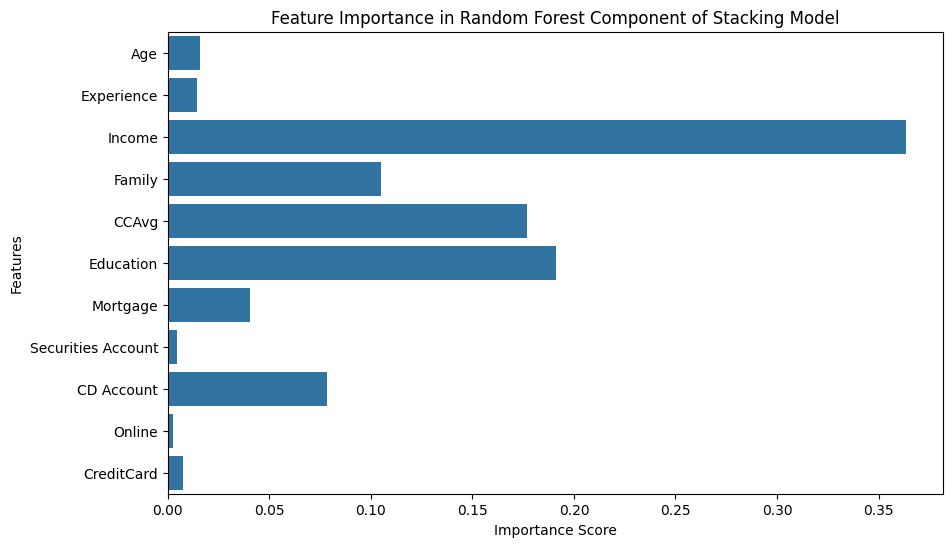

In [58]:
best_rf_model = stacking_model.named_estimators_['rf']
feature_importances = best_rf_model.feature_importances_
features = X.columns

# Plotting Feature Importance for Random Forest component
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features)
plt.title("Feature Importance in Random Forest Component of Stacking Model")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

## Combined Analysis

In [59]:
# Function to calculate and display evaluation metrics
def evaluate_metrics(y_test, y_pred, y_pred_proba=None):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None

    metrics = {
        'Accuracy': [accuracy],
        'Precision': [precision],
        'Recall': [recall],
        'F1 Score': [f1],
        'AUC': [auc] if auc is not None else ['N/A']
    }
    # Print metrics to console
    print(pd.DataFrame(metrics))
    return pd.DataFrame(metrics)

# Function to display and return confusion matrix as a DataFrame
def plot_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()
    return pd.DataFrame(cm, index=['Actual No', 'Actual Yes'], columns=['Predicted No', 'Predicted Yes'])

# Function to plot ROC curve
def plot_roc_curve(y_test, y_pred_proba):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color="blue", label=f"AUC = {auc:.2f}")
    plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.show()

# Function to display and return feature importance as a DataFrame (for models with feature_importances_)
def plot_feature_importance(model, feature_names):
    if hasattr(model, "feature_importances_"):
        feature_importances = model.feature_importances_
        sorted_idx = np.argsort(feature_importances)[::-1]  # Sort features by importance

        plt.figure(figsize=(10, 6))
        sns.barplot(x=feature_importances[sorted_idx], y=feature_names[sorted_idx])
        plt.title("Feature Importance")
        plt.xlabel("Importance Score")
        plt.ylabel("Features")
        plt.show()

        importance_df = pd.DataFrame({
            'Feature': feature_names[sorted_idx],
            'Importance': feature_importances[sorted_idx]
        })
        return importance_df
    else:
        print("Feature importance is not available for this model.")
        return pd.DataFrame({'Feature': [], 'Importance': []})  # Empty DataFrame if not available


Analyzing Random Forest Results
Evaluation Metrics:
   Accuracy  Precision    Recall  F1 Score       AUC
0  0.979333   0.992188  0.808917  0.891228  0.998245

Confusion Matrix:


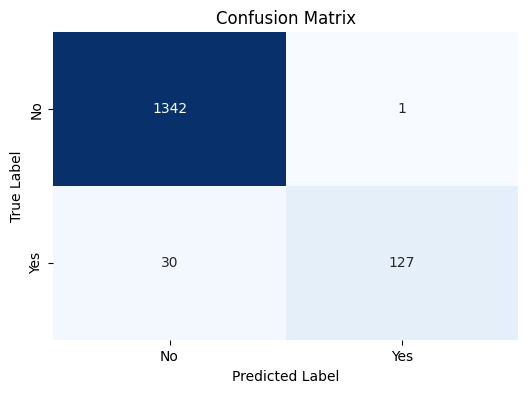


ROC Curve:


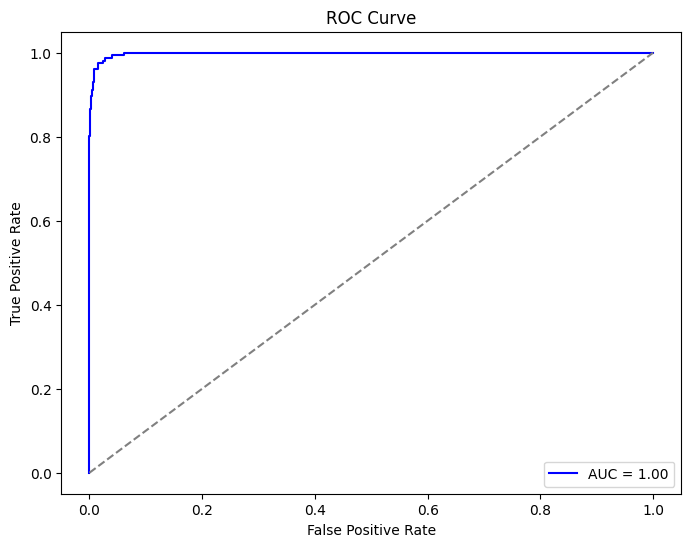


Feature Importance:


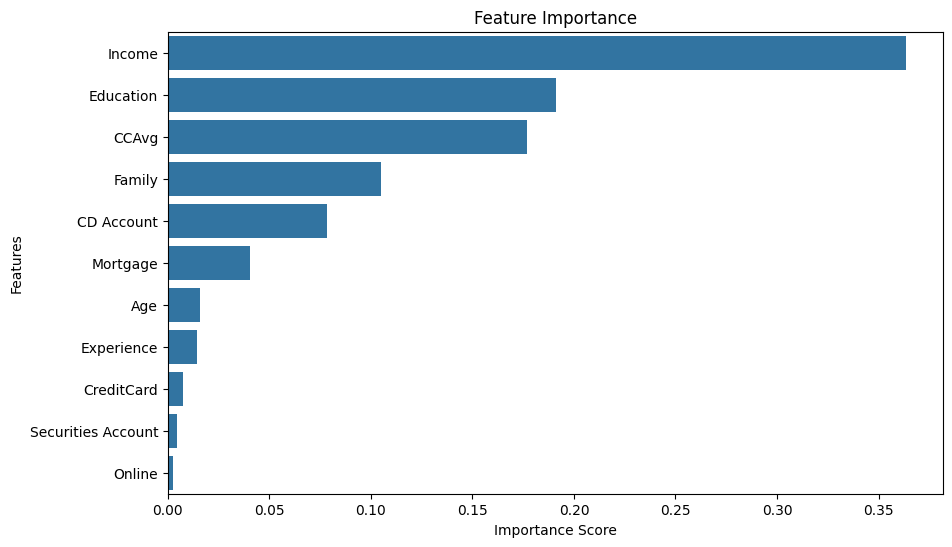


Analyzing Extra Trees Results
Evaluation Metrics:
   Accuracy  Precision    Recall  F1 Score       AUC
0  0.984667   0.985507  0.866242  0.922034  0.998696

Confusion Matrix:


/usr/local/lib/python3.10/dist-packages/openpyxl/workbook/child.py:99: UserWarning: Title is more than 31 characters. Some applications may not be able to read the file
  warnings.warn("Title is more than 31 characters. Some applications may not be able to read the file")


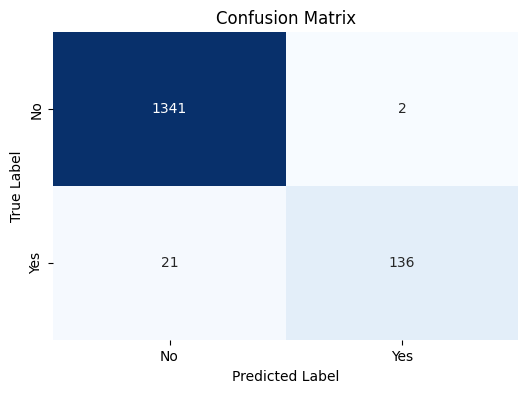


ROC Curve:


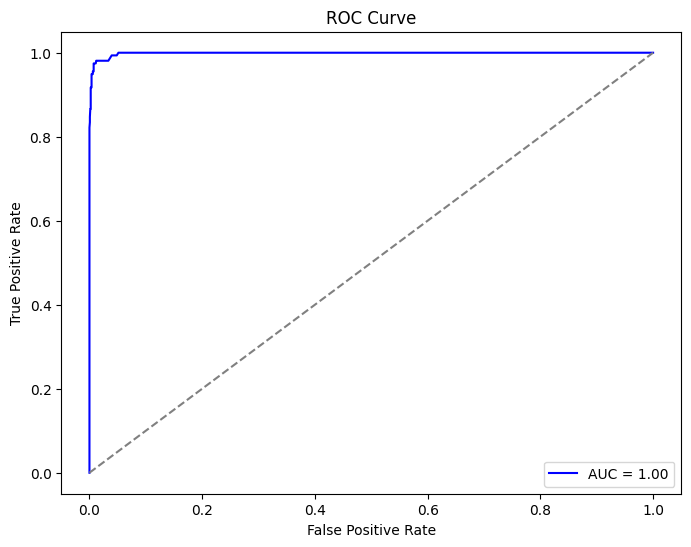


Feature Importance:


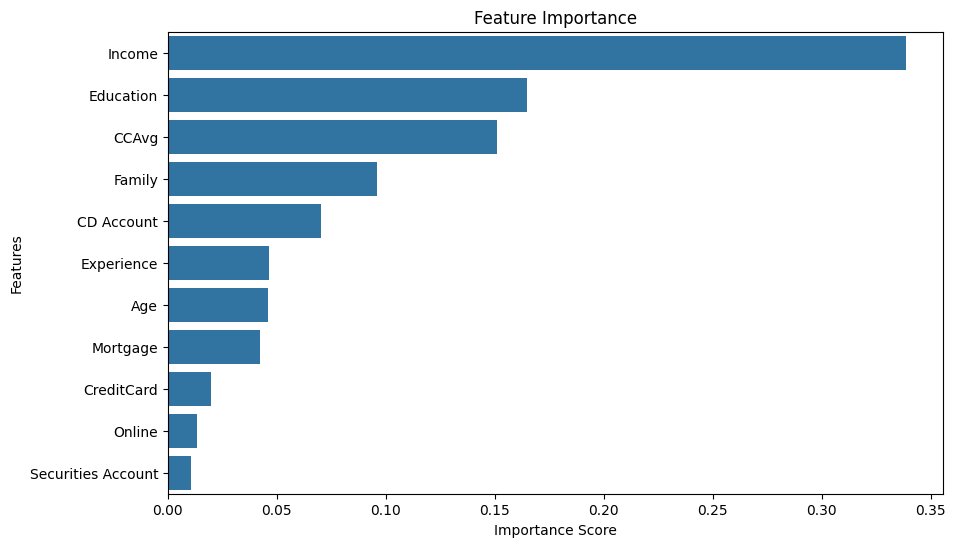


Analyzing AdaBoost Results
Evaluation Metrics:
   Accuracy  Precision    Recall  F1 Score      AUC
0     0.988   0.954248  0.929936  0.941935  0.99765

Confusion Matrix:


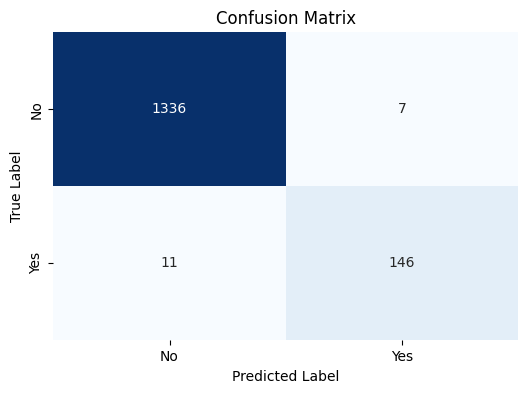


ROC Curve:


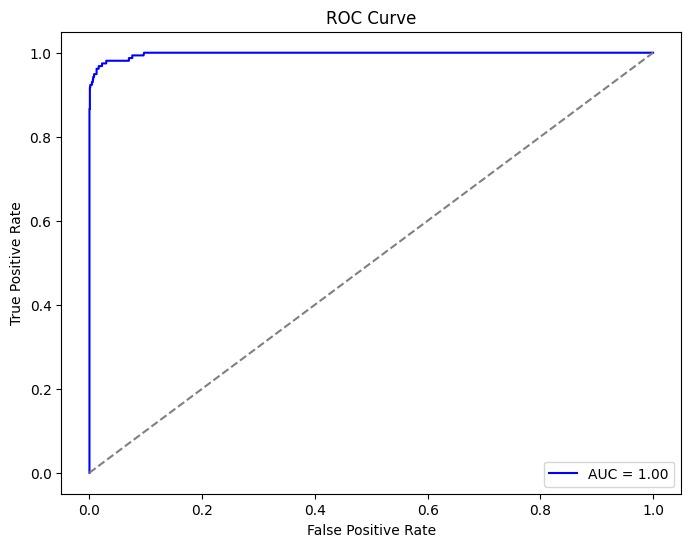


Feature Importance:


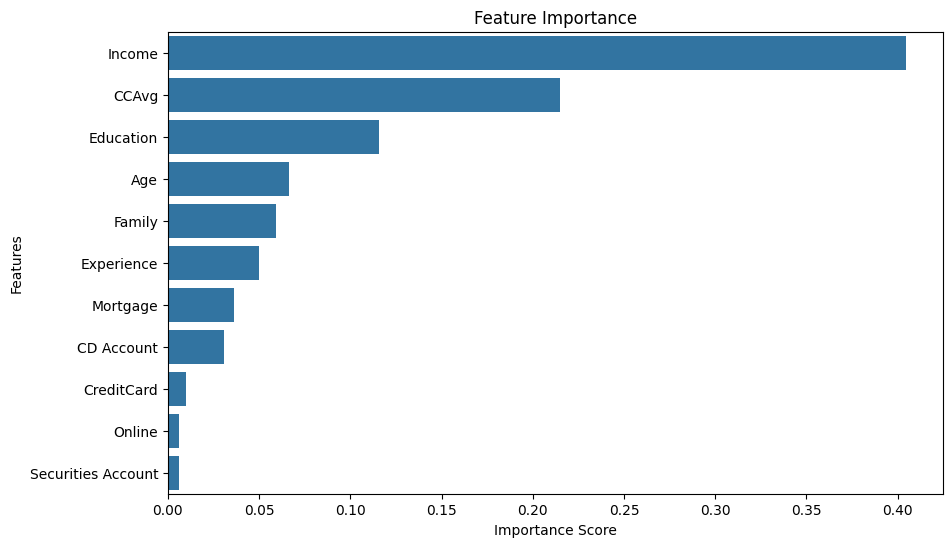


Analyzing Gradient Boosting Results
Evaluation Metrics:
   Accuracy  Precision    Recall  F1 Score       AUC
0      0.99    0.97973  0.923567   0.95082  0.998784

Confusion Matrix:


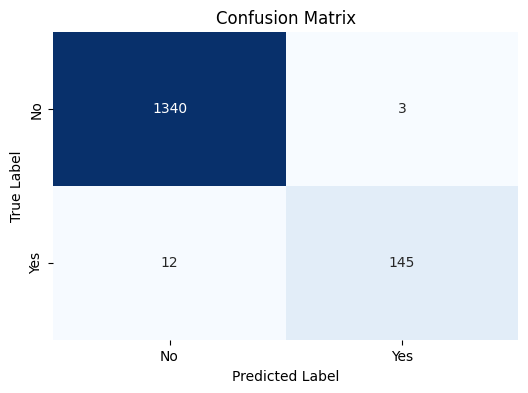


ROC Curve:


/usr/local/lib/python3.10/dist-packages/openpyxl/workbook/child.py:99: UserWarning: Title is more than 31 characters. Some applications may not be able to read the file
  warnings.warn("Title is more than 31 characters. Some applications may not be able to read the file")


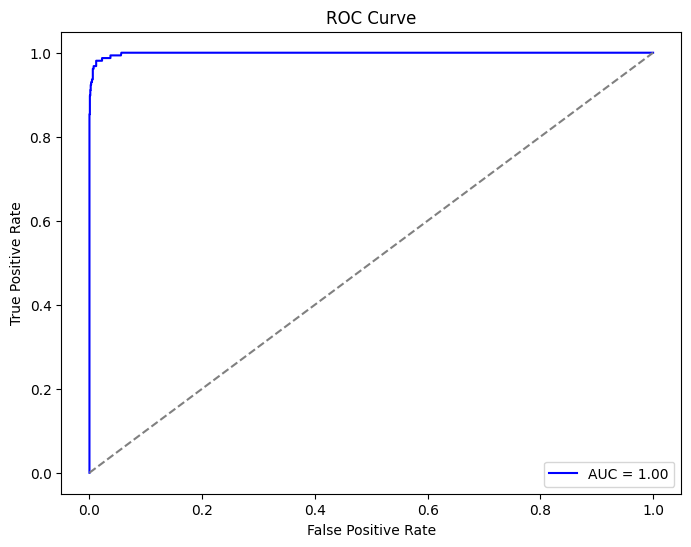


Feature Importance:


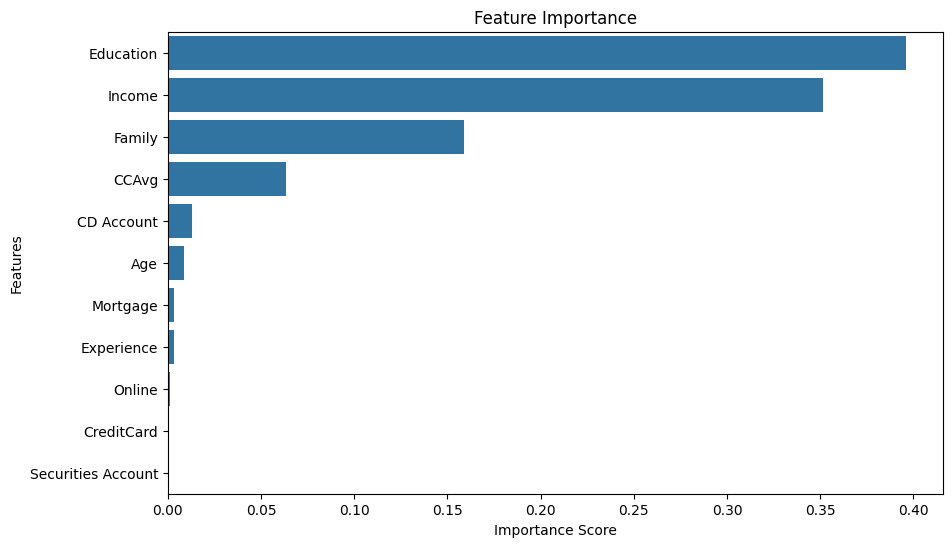

/usr/local/lib/python3.10/dist-packages/openpyxl/workbook/child.py:99: UserWarning: Title is more than 31 characters. Some applications may not be able to read the file
  warnings.warn("Title is more than 31 characters. Some applications may not be able to read the file")



Analyzing XGBoost Results
Evaluation Metrics:
   Accuracy  Precision    Recall  F1 Score       AUC
0     0.992   0.993197  0.929936  0.960526  0.999032

Confusion Matrix:


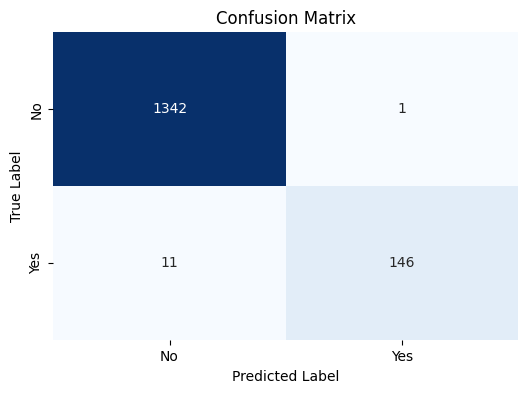


ROC Curve:


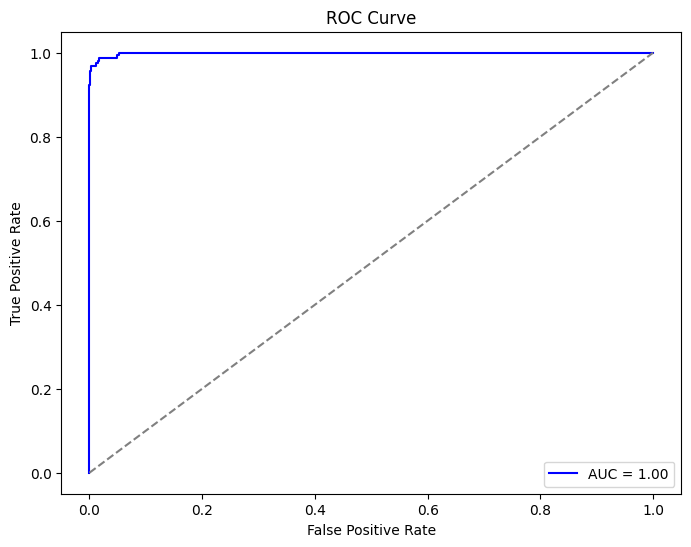


Feature Importance:


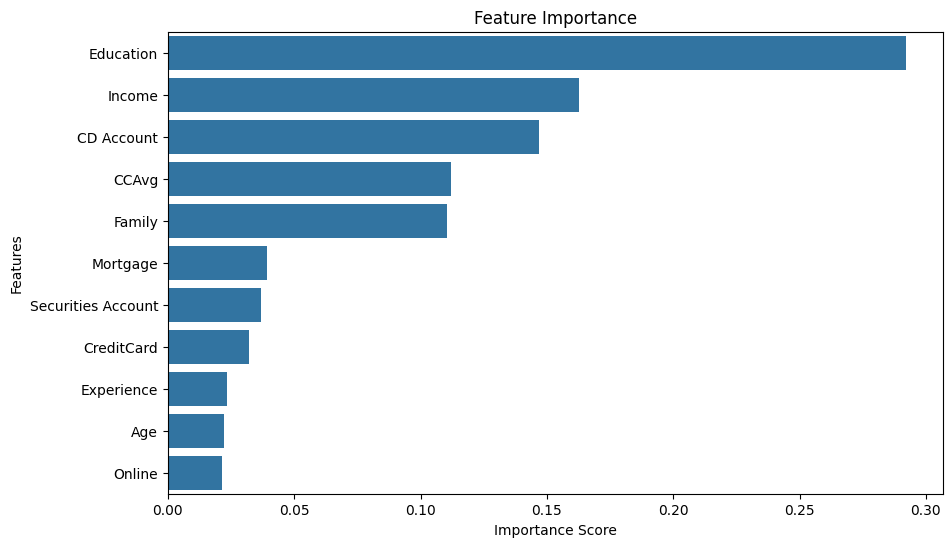


Analyzing Stacking Model Results
Evaluation Metrics:
   Accuracy  Precision    Recall  F1 Score       AUC
0  0.989333   0.979592  0.917197  0.947368  0.998259

Confusion Matrix:


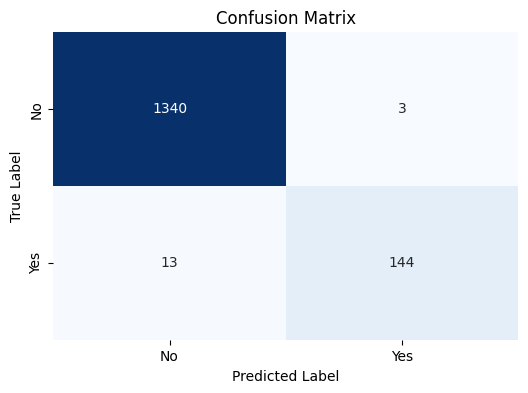


ROC Curve:


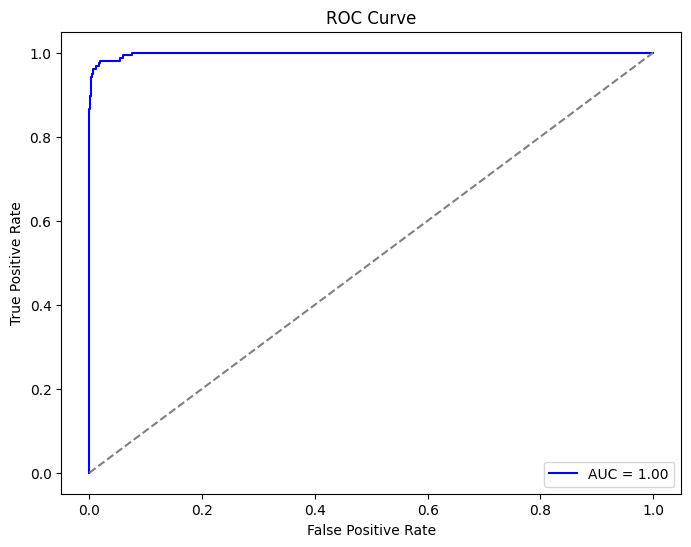


Feature Importance:
Feature importance is not available for this model.


In [60]:
# Dictionary of trained models for analysis
models = {
    "Random Forest": best_rf_model,
    "Extra Trees": best_et_model,
    "AdaBoost": best_ada_model,
    "Gradient Boosting": best_gb_model,
    "XGBoost": best_xgb_model,
    "Stacking Model": stacking_model
}

# Initialize an Excel writer
with ExcelWriter("Model_Analysis.xlsx", engine="openpyxl") as writer:
    # Perform analysis for each model and save to different sheets
    for model_name, model in models.items():
        print(f"\nAnalyzing {model_name} Results")

        # Get predictions and predicted probabilities if available
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

        # 1. Evaluation Metrics
        print("Evaluation Metrics:")
        metrics_df = evaluate_metrics(y_test, y_pred, y_pred_proba)
        metrics_df.to_excel(writer, sheet_name=f"{model_name} Metrics", index=False)

        # 2. Confusion Matrix
        print("\nConfusion Matrix:")
        cm_df = plot_confusion_matrix(y_test, y_pred)
        cm_df.to_excel(writer, sheet_name=f"{model_name} Confusion Matrix", index=True)

        # 3. ROC Curve (if probabilities are available)
        if y_pred_proba is not None:
            print("\nROC Curve:")
            plot_roc_curve(y_test, y_pred_proba)

        # 4. Feature Importance (if available)
        print("\nFeature Importance:")
        feature_importance_df = plot_feature_importance(model, X.columns)
        if not feature_importance_df.empty:
            feature_importance_df.to_excel(writer, sheet_name=f"{model_name} Feature Importance", index=False)